### Sample code for Principal Component Analysis (PCA)  

#### Import libraries  

In [24]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [25]:
#Cell_2.
csv_in = 'Grades.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [26]:
#Cell_3.
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0,encoding='shift-jis')
print(df.shape)
print(df.info())
display(df.head())

(10, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   生徒      10 non-null     int64
 1   国語      10 non-null     int64
 2   英語      10 non-null     int64
 3   数学      10 non-null     int64
 4   理科      10 non-null     int64
dtypes: int64(5)
memory usage: 528.0 bytes
None


,生徒,国語,英語,数学,理科
0,1,86,79,67,68
1,2,71,75,78,84
2,3,42,43,39,44
3,4,62,58,98,95
4,5,96,97,61,63


#### Set data  

In [27]:
#Cell_4.
dfX =df.drop(columns='生徒')
n=dfX.shape[0] #sample size.
p=dfX.shape[1] #number of features.

print(n)
print(dfX.shape)
display(dfX.head())

10
(10, 4)


,国語,英語,数学,理科
0,86,79,67,68
1,71,75,78,84
2,42,43,39,44
3,62,58,98,95
4,96,97,61,63


#### Standardization  

In [28]:
#Cell_5.
sc = StandardScaler()
X_std = sc.fit_transform(dfX)*(np.sqrt(n-1))/(np.sqrt(n))
print(X_std)

[[ 0.95406283  0.6958578  -0.01548941 -0.03337686]
 [ 0.22391271  0.51029572  0.5524556   0.85667266]
 [-1.18771087 -0.97420092 -1.46116762 -1.36845113]
 [-0.21417737 -0.27834312  1.58508289  1.4685817 ]
 [ 1.44082958  1.53088716 -0.3252776  -0.31151733]
 [-1.3337409  -1.43810612 -1.15137943 -1.03468256]
 [-0.79829747 -0.51029572 -0.1703835   0.18913552]
 [ 0.56464943  0.09278104 -0.78995988 -1.20156685]
 [-0.7496208  -0.9278104   0.44919287  0.18913552]
 [ 1.10009286  1.29893456  1.32692607  1.24606933]]


#### PCA  

In [29]:
#Cell_6.
n_pca = 2
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### PC coordinates  

In [30]:
#Cell_7.
#主成分得点
print(X_pca.shape)
print(X_pca)

(10, 2)
[[-0.79580471  0.85761206]
 [-1.07321206 -0.34756917]
 [ 2.49415668  0.32030618]
 [-1.28398744 -1.76450267]
 [-1.1645755   1.80251845]
 [ 2.47997166 -0.29770231]
 [ 0.64278598 -0.6785089 ]
 [ 0.67200372  1.34136483]
 [ 0.51728134 -1.14860039]
 [-2.48861967 -0.08491807]]


In [31]:
#Cell_8.
#固有値
print('eigenvalues:',pca.explained_variance_)
#固有ベクトルの成分
print('eigenvectors:',pca.components_)

eigenvalues: [2.72073297 1.22179954]
eigenvectors: [[-0.48727267 -0.5105362  -0.50831859 -0.49348793]
 [ 0.52733742  0.47399677 -0.48074769 -0.51587204]]


In [32]:
#Cell_9.
#因子負荷量
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) 
print(loadings)

[[-0.80373895  0.58289263]
 [-0.84211131  0.52393252]
 [-0.83845344 -0.53139466]
 [-0.8139908  -0.57021938]]


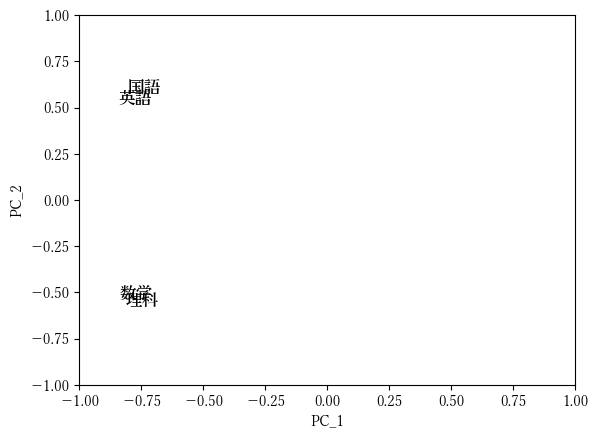

In [39]:
#Cell_10.因子負荷量の可視化
font = {'family' : 'Yu Mincho'}
plt.rc('font', **font)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
for i in range(p):
    plt.text(loadings[i,0],loadings[i,1], str(dfX.columns[i]),fontdict={'weight':'bold','size':12})

plt.show()

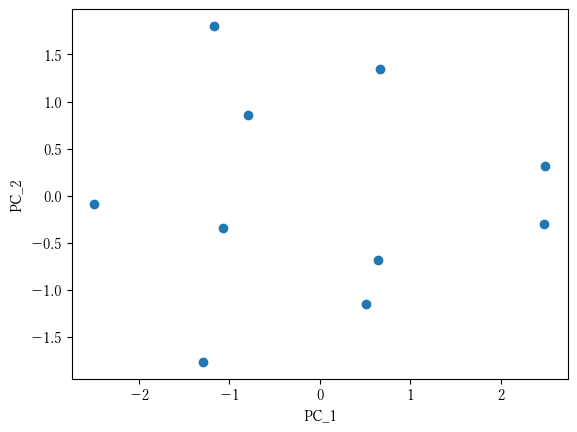

In [40]:
#Cell_11.主成分得点の可視化
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

#### Check contribution ratio  

In [35]:
#Cell_12.
print("各主成分ごとの寄与率：",pca.explained_variance_ratio_)
print("各主成分までの累積寄与率：",np.cumsum(pca.explained_variance_ratio_))

各主成分ごとの寄与率： [0.68018324 0.30544988]
各主成分までの累積寄与率： [0.68018324 0.98563313]


#### Draw graph of contribution  

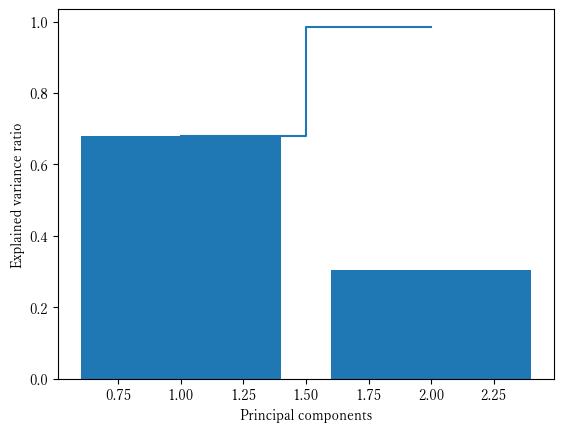

In [36]:
#Cell_13.
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

#### 2D plot 

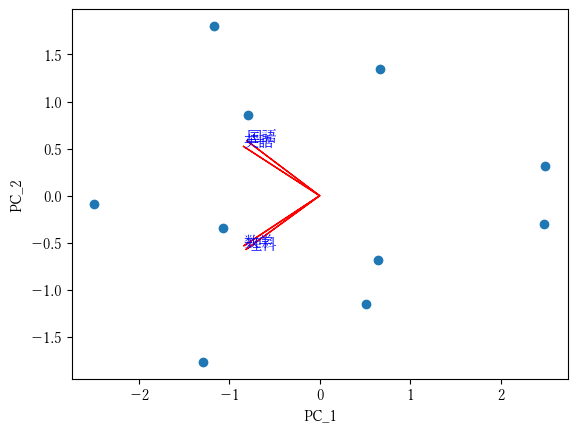

In [37]:
#Cell_14.
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 1
    r2 = 1
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], loadings.T, coef_labels=dfX.columns)

In [38]:
 loadings.T

array([[-0.80373895, -0.84211131, -0.83845344, -0.8139908 ],
       [ 0.58289263,  0.52393252, -0.53139466, -0.57021938]])